## <center>Customizing Ticks
---

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib as mpl
from analysis_tools.display import Display
plt.style.use('classic')

> Matplotlib’s default tick locators and formatters are designed to be generally sufficient
in many common situations, but are in no way optimal for every plot.<br>

Objects Hierarchy: `fig` >>> `axes` >>> `ticks`

> #### Major and Minor Ticks
> _major ticks_ are bigger or more pronounced, while minor ticks are smaller.
<br> By default, `Matplotlib` rarely makes use of minor ticks, but
one place you can see them is within logarithmic plots
 

Text(-80, 40, 'Minor tick')

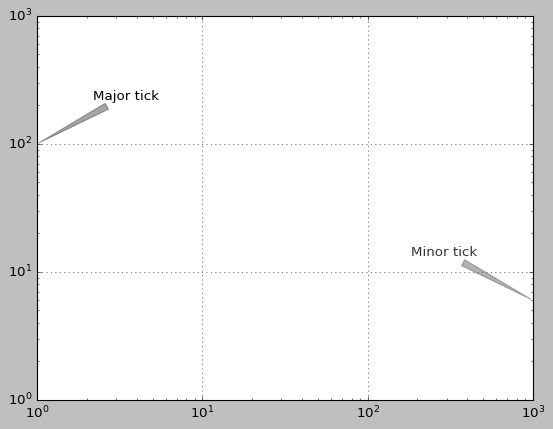

In [72]:
ax = plt.axes(xscale='log', yscale='log')
ax.set(xlim=(1, 1E3), ylim=(1, 1E3))
ax.grid(True);

#label ticks
ax.annotate("Major tick", xy=(1, 1E2), xycoords='data', xytext=(80,40), ha='center', textcoords='offset points',
            arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color='0.3', alpha=0.5))

ax.annotate("Minor tick", xy=(1E3, 6), xycoords='data', xytext=(-80,40), ha='center', textcoords='offset points', color='0.2',
            arrowprops=dict(arrowstyle="wedge, tail_width=0.5", color='0.4', alpha=0.5)) 

These tick properties—locations and labels, that is—can be customized by setting the
formatter and locator objects of each axis.

In [37]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())



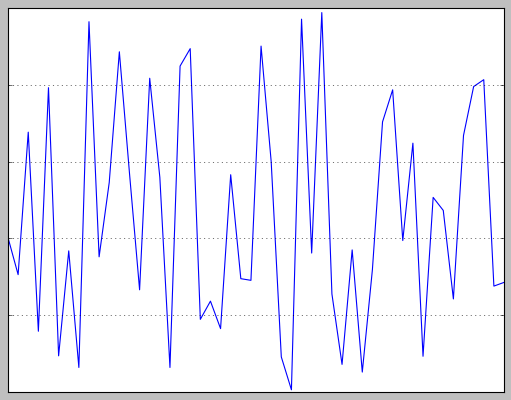

In [43]:
ax = plt.axes()
rng = np.random.default_rng(1701)
ax.plot(rng.random(50))
ax.grid()

ax.xaxis.set_major_locator(plt.NullLocator()) #removes ticks and thus labels

ax.yaxis.set_major_formatter(plt.NullFormatter()) #removes labels

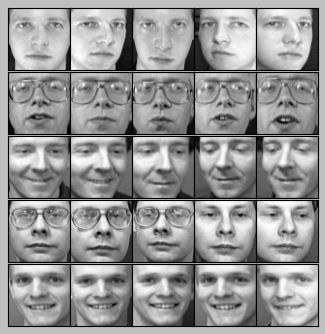

In [51]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# Get some face data from Scikit-Learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10*i + j], cmap='binary_r')
        

    


> #### Reducing or Increasing the Number of Ticks


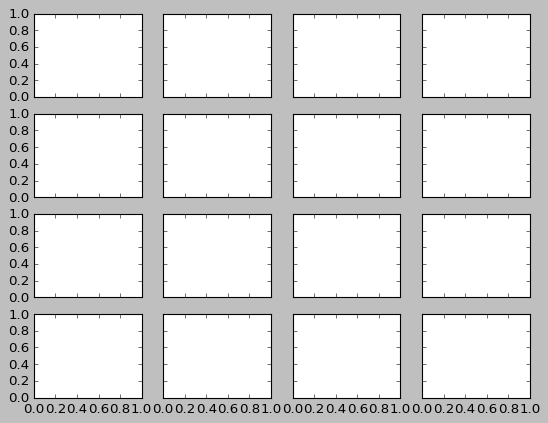

In [62]:
fig2, ax = plt.subplots(4, 4, sharex=True, sharey=True)

As you can see, the ticks are close together and are quite difficult to decipher.
use `plt.MaxNLocator`, which allows us to specify the maximum number of ticks to be displayed

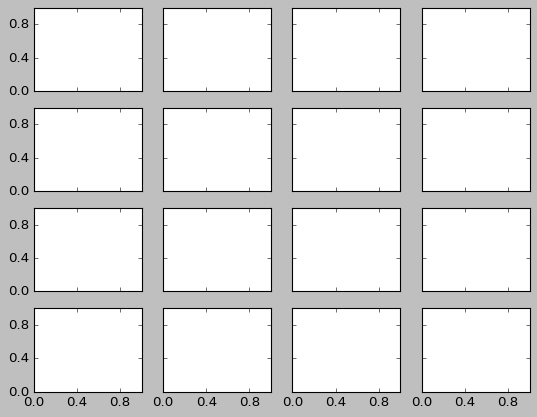

In [63]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig2

>#### Fancy Tick Formats

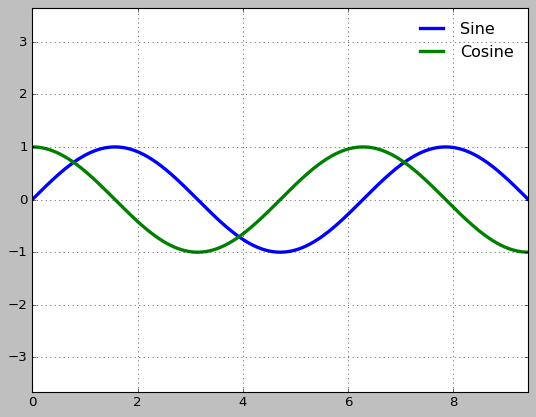

In [79]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);

> It’s more natural to space the ticks and gridlines for this data in multiples of π. 
We set the `MultipleLocator`, which locates ticks at a multiple of the number we provide. We’ll add both major and minor ticks in multiples of π/2 and π/4.

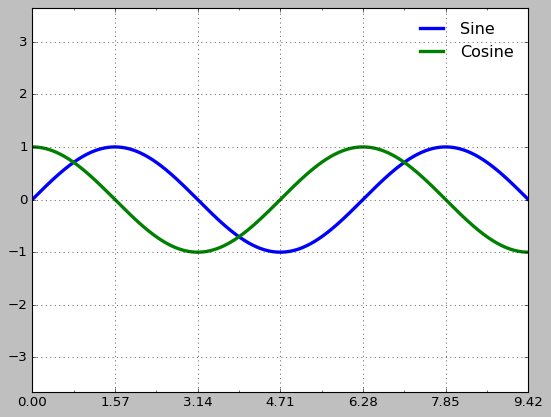

In [80]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

> Although the tick labels are multiples of π, the decimal representation does not immediately convey this. To fix this, we can change the tick formatter.<br>
There’s no built-in formatter for this, so we’ll instead use `plt.FuncFormatter`, which accepts a user-defined function giving
fine-grained control over the tick outputs 

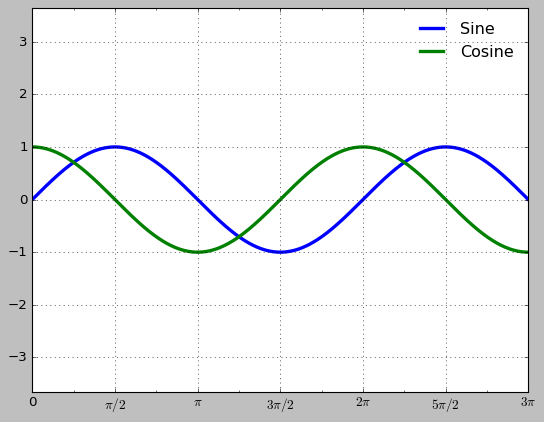

In [81]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return rf"${N}\pi/2$"
    else:
        return rf"${N//2}\pi$"
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

> Each of the following is available in the `plt` namespace.
---
#### Matplotlib locator options
Locator class | Description
---|---
NullLocator  | No ticks
FixedLocatorTick  |locations are fixed
IndexLocator  | Locator for index plots (e.g., where x = range(len(y)))
LinearLocator  | Evenly spaced ticks from min to max
LogLocator  | Logarithmically spaced ticks from min to max
MultipleLocator  | Ticks and range are a multiple of base
MaxNLocator  | Finds up to a max number of ticks at nice locations
AutoLocator  | (Default) MaxNLocator with simple defaults
AutoMinorLocator  | Locator for minor ticks

#### Matplotlib formatter options
Formatter class | Description
---|---
NullFormatter | No labels on the ticks
IndexFormatter  | Set the strings from a list of labels
FixedFormatter  | Set the strings manually for the labels
FuncFormatter  | User-defined function sets the labels
FormatStrFormatter  | Use a format string for each value
ScalarFormatter  | Default formatter for scalar values
LogFormatter  | Default formatter for log axes